# mridataPy for MRI Tutorial

In [1]:
import mridatapy

mridatapy.__version__

'0.0.5'

## Help Functions and Constants

In [2]:
import time

def time_since(since):
    now = time.time()
    elapsed = now - since
    return elapsed

In [3]:
import matplotlib.pyplot as plt

def show(im, cmap='gray'):   
    plt.imshow(im, cmap=cmap)
    plt.show()

In [4]:
SHAPE = (320, 320)  # shape of sampling mask

In [5]:
IDX_SLICE = 127  # index of a slice in the given k-space volumn

## Module `data`

### mridata: Class `data.MRIData(data_type=None, path=None)`

#### [Stanford Fullysampled 3D FSE Knees](http://mridata.org/list?project=Stanford%20Fullysampled%203D%20FSE%20Knees) from [mridata.org](http://mridata.org/)

> Epperson, et al. [Creation of Fully Sampled MR Data Repository for Compressed Sensing of the Knee](http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=C553DFF7E26F2BC2054B83482E623169?doi=10.1.1.402.206&rep=rep1&type=pdf). SMRT Conference, Salt Lake City, UT, 2013. 

#### General Info of Dataset

* Total 20 cases, for each case:

|  |  |
| --- | --- |
| Number of Coils | 8 |
| Matrix Size | 320 x 320 x 1 |
| Number of Slices | 256 |
| Number of Phases | 1 |
| Number of Contrasts | 1 |
| Trajectory | Cartesian |

* Alternative source: [Stanford Fullysampled 3D FSE Knees](http://old.mridata.org/fullysampled/knees) from [old.mridata.org](http://old.mridata.org/)

In [6]:
mridata = mridatapy.data.MRIData()

In [7]:
mridata.type

'ismrmrd'

In [8]:
mridata.dir

PosixPath('mridata')

* Download one case of mridata from mridata.org under the directory `mridata.dir`

In [9]:
now = time.time()
mridata.download(num=1)
time_since(now)

100%|██████████| 1674063/1674063 [03:07<00:00, 8932.69KB/s] 


189.13782405853271

* Convert one mridata file under the directory `mridata.dir` to .npy file. If there not exists any mridata file, download one case first. NumPy array stored in .npy file has the shape of `(Nslices, Ncoils, Nx, Ny)`, specifically, `(256, 8, 320, 320)`

In [11]:
now = time.time()
npyfiles = mridata.to_npy(num=1)
time_since(now)

100%|██████████| 81920/81920 [09:38<00:00, 141.67it/s]


582.4077413082123

* Load NumPy array from the .npy file just right converted corresponding to one case

In [12]:
a = mridata.load_npy(npyfiles[0])
a.shape

(256, 8, 320, 320)

### Sampling Mask: Class `RandomLine`, `EquispacedLine`, `PoissonDisk`

A generated sampling mask can densely sample the center region in k-space while subsample the outer region based on acceleration factor.

#### Class `RandomLine(acceleration_factor, center_fraction)`

* k-space trajectory with 4-fold acceleration generated by `RandomLine`

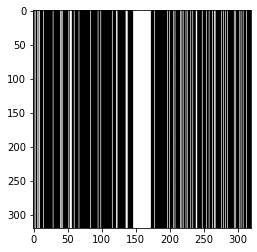

In [13]:
random = mridatapy.data.RandomLine(4, 0.08)
show(random(SHAPE))

#### Class `EquispacedLine(acceleration_factor, center_fraction)`

* k-space trajectory with 4-fold acceleration generated by `EquispacedLine`

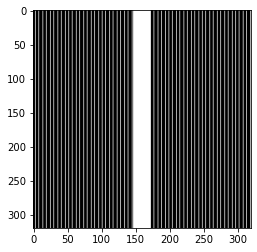

In [14]:
equispaced = mridatapy.data.EquispacedLine(4, 0.08)
show(equispaced(SHAPE))

#### Class `PoissonDisk(acceleration_factor, center_fraction)`

* k-space trajectory with 4-fold acceleration generated by `PoissonDisk`

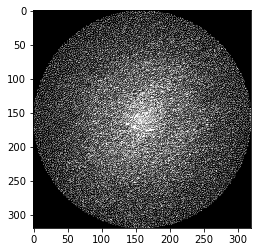

In [15]:
poisson = mridatapy.data.PoissonDisk(4, 0.0)
show(poisson(SHAPE))

## Module `utils`

### Transforms: Fuction `fft_centered`, `ifft_centered`, `root_sum_squares`

* Root-sum-of-squares reconstruction applied to the given fullysampled slice provides the ground truth

> J. Zbontar, F. Knoll, A. Sriram, M. J. Muckley, M. Bruno, A. Defazio, M. Parente, K. J. Geras, J. Katsnelson, and H.Chandarana. fastMRI: An open dataset and benchmarks for accelerated MRI. arXiv preprint [arXiv:1811.08839](https://arxiv.org/pdf/1811.08839.pdf), 2018.

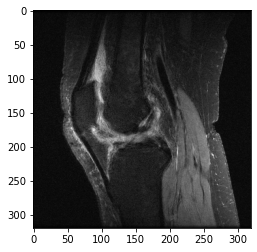

In [16]:
gt = mridatapy.utils.ifft_centered(a[IDX_SLICE], dim=(-2, -1))
gt = mridatapy.utils.root_sum_squares(gt, dim=0)
show(gt)

* Zero-filled reconstruction for an undersampled slice of acceleration factor 4 using `RandomLine`

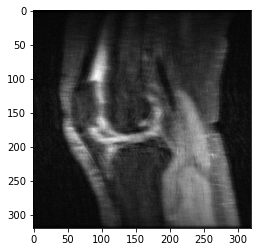

In [17]:
pred = mridatapy.utils.ifft_centered(a[IDX_SLICE] * random(SHAPE), dim=(-2, -1))
pred = mridatapy.utils.root_sum_squares(pred, dim=0)
show(pred)

* Zero-filled reconstruction for an undersampled slice of acceleration factor 4 using `EquispacedLine`

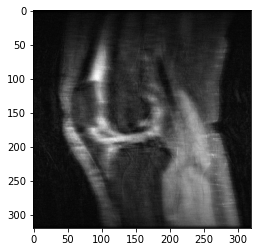

In [18]:
pred = mridatapy.utils.ifft_centered(a[IDX_SLICE] * equispaced(SHAPE), dim=(-2, -1))
pred = mridatapy.utils.root_sum_squares(pred, dim=0)
show(pred)

* Zero-filled reconstruction for an undersampled slice of acceleration factor 4 using `PoissonDisk`

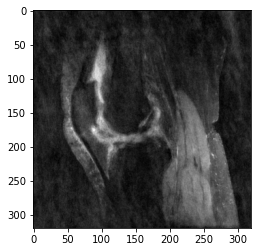

In [19]:
pred = mridatapy.utils.ifft_centered(a[IDX_SLICE] * poisson(SHAPE), dim=(-2, -1))
pred = mridatapy.utils.root_sum_squares(pred, dim=0)
show(pred)

## Module `metrics`

### Metrics: Fuction `mean_squared_error`, `normalized_mse`, `peak_signal_noise_ratio`, `structural_similarity`

#### MSE: Fuction `mean_squared_error(gt, pred)`

In [20]:
mse = mridatapy.metrics.mean_squared_error(gt, pred)
mse

145972.28206387736

#### NMSE: Fuction `normalized_mse(gt, pred)`

In [21]:
nmse = mridatapy.metrics.normalized_mse(gt, pred)
nmse

0.09910722190715218

#### PSNR: Fuction `peak_signal_noise_ratio(gt, pred, data_range=None)`

In [22]:
psnr = mridatapy.metrics.peak_signal_noise_ratio(gt, pred, data_range=gt.max())
psnr

23.763032507452646

#### SSIM: Fuction `structural_similarity(gt, pred, data_range=None)`

In [23]:
ssim = mridatapy.metrics.structural_similarity(gt, pred, data_range=gt.max())
ssim

0.6358862393682759